# Proyecto Individual 02: Machine Learning

## EDA

En esta primera etapa se realizará un análisis exploratorio de los datos 

In [425]:
# Importando las librerias 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.cluster import KMeans

In [426]:
# Creamos un dataframe con los datos de entrenamiento
X = pd.read_csv('datasets\properties_colombia_train.csv')
X.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


Podemos observar las columnas que componen el dataset. En principio las las columnas Unnamed: 0 y id parecen ser identificadores de los anuncios. Estas columnas puedes ser descartadas ya que no proporcionan (aparentemente) información para nuestro modelo. Las demás columnas parece contener información útil para el modelo. Tendremos que evaluarlas más a fondo.

In [427]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

Podemos ver que las columnas l4, l5, l6, room, bedrooms, surface_total, surface_covered poseen una cantidad considerable de valores nulos.

La columna geometry posee los valores de longitud y latitud unidos en una misma variable. Se puede considerar descartarla.

Las columnas created_on y start_date parecen poseer los mismos valores. Vamos a comprobarlo:

In [428]:
# Verificando si la columna created_on y start_date poseen los mismos valores
(X.created_on != X.start_date).sum()

0

Efectivamente los valores son iguales. Se puede considerar descartar alguna de ellas.

Vamos a revisar los valores únicos de cada columna.

In [429]:
# Valores unicos
X.nunique()

Unnamed: 0         197549
id                 197549
ad_type                 1
start_date            145
end_date              446
created_on            145
lat                 51077
lon                 50108
l1                      1
l2                     31
l3                    293
l4                     58
l5                     20
l6                    146
rooms                  29
bedrooms               37
bathrooms              20
surface_total        1035
surface_covered       783
price                6096
currency                2
price_period            1
title               95025
description        111371
property_type           8
operation_type          1
geometry            62807
dtype: int64

Podemos ver que las columnas Unnamed 0: y id contiene enteramente valores únicos. Estas columnas podemos descartarlas. También podemos apreciar columnas como ad_type, l1, price_period y operation_type con un solo valor.

In [430]:
print(X.operation_type.unique())
print(X.price_period.unique())
print(X.ad_type.unique())
print(X.l1.unique())

['Venta']
[nan 'Mensual']
['Propiedad']
['Colombia']


Son columnas que podemos descartar.

In [431]:
print(X.currency.unique())

['COP' nan 'USD']


Podemos ver que tenemos precios publicados en dólares estadounidenses y pesos colombianos. Es necesario normalizar los datos a una sola moneda. Más adelante realizaremos esta conversión. 

Eliminaremos las columnas que no proporcionan información útil:

In [432]:
# Eliminando columnas
X.drop(['Unnamed: 0', 'id', 'ad_type', 'l1', 'price_period', 'operation_type', 'created_on', 'geometry'], axis='columns', inplace=True)

In [433]:
X.head()

,start_date,end_date,lat,lon,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type
0,2020-12-14,9999-12-31,6.203000,-75.572000,Antioquia,Medellín,El Poblado,NaN,NaN,NaN,4.0,4.0,NaN,NaN,9.000000e+09,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa
1,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,NaN,3.0,2.0,NaN,NaN,6.250000e+08,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento
2,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,NaN,NaN,2.0,NaN,NaN,4.200000e+08,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa
3,2020-11-23,2020-11-30,NaN,NaN,Santander,Bucaramanga,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.310000e+09,COP,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro
4,2020-10-06,2020-10-07,NaN,NaN,Antioquia,Medellín,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.100000e+08,COP,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento


In [434]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       197549 non-null  object 
 1   end_date         197549 non-null  object 
 2   lat              148051 non-null  float64
 3   lon              148051 non-null  float64
 4   l2               197549 non-null  object 
 5   l3               186517 non-null  object 
 6   l4               45367 non-null   object 
 7   l5               27409 non-null   object 
 8   l6               6867 non-null    object 
 9   rooms            27537 non-null   float64
 10  bedrooms         40525 non-null   float64
 11  bathrooms        156467 non-null  float64
 12  surface_total    6974 non-null    float64
 13  surface_covered  9802 non-null    float64
 14  price            197486 non-null  float64
 15  currency         197482 non-null  object 
 16  title            197548 non-null  obje

A continuación convertiremos los precios es USD a COP. Todos los anuncuos fueron publicados en el año 2020. Tomaremos el promedio de la tasa de cambio para el año 2020:

https://www.exchangerates.org.uk/USD-COP-spot-exchange-rates-history-2020.html

In [435]:
# Convirtiendo USD a COP
X.loc[X.currency == 'USD', 'price'] = X.price * 3691.3167 

Podemos descartar la columna currency

In [436]:
X.drop(['currency'], axis='columns', inplace=True)

A continuación verificamos la cantidad de datos faltantes para cada columna.

In [437]:
# Propoción de datos nulos.
X.isnull().mean()*100

start_date          0.000000
end_date            0.000000
lat                25.056062
lon                25.056062
l2                  0.000000
l3                  5.584437
l4                 77.035065
l5                 86.125468
l6                 96.523900
rooms              86.060674
bedrooms           79.486102
bathrooms          20.795853
surface_total      96.469737
surface_covered    95.038193
price               0.031891
title               0.000506
description         0.061251
property_type       0.000000
dtype: float64

In [438]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       197549 non-null  object 
 1   end_date         197549 non-null  object 
 2   lat              148051 non-null  float64
 3   lon              148051 non-null  float64
 4   l2               197549 non-null  object 
 5   l3               186517 non-null  object 
 6   l4               45367 non-null   object 
 7   l5               27409 non-null   object 
 8   l6               6867 non-null    object 
 9   rooms            27537 non-null   float64
 10  bedrooms         40525 non-null   float64
 11  bathrooms        156467 non-null  float64
 12  surface_total    6974 non-null    float64
 13  surface_covered  9802 non-null    float64
 14  price            197486 non-null  float64
 15  title            197548 non-null  object 
 16  description      197428 non-null  obje

Podemos observar que hay varias columnas con un alto porcentaje de valores faltantes: l4, l5, l6, rooms, bedrooms, surface_total ysurface_covered. Exploremos si es posible rellenar esos valores con información de otras columnas. Hay un bajo porcentaje de valores nulos en la columna price. Vamos a llenar esos valores con la media. 

Vamos a ver si hay outliers en la columna price

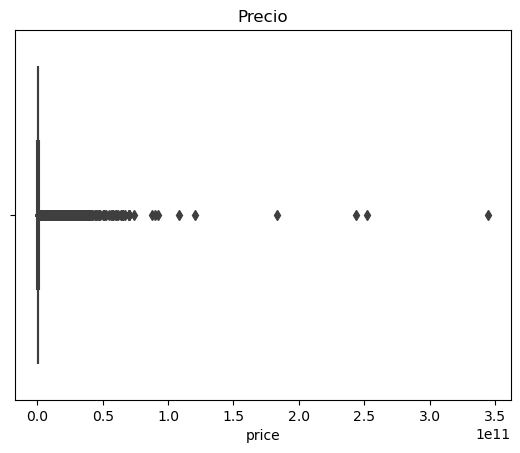

In [439]:
# Graficando un boxplot.
sns.boxplot(data=X, x='price')
plt.title('Precio');

Voy a calcular el valor de IQR para descartar outliers.

In [440]:
'''# Calculando IQR y el rango superior e inferior, respectivamente. 
Q1 = X.price.quantile(0.25)
Q3 = X.price.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR'''

'# Calculando IQR y el rango superior e inferior, respectivamente. \nQ1 = X.price.quantile(0.25)\nQ3 = X.price.quantile(0.75)\nIQR = Q3 - Q1\nlower_range = Q1 - 1.5 * IQR\nupper_range = Q3 + 1.5 * IQR'

In [441]:
'''# Eliminando los outliers.
X = X.loc[(X.price >= lower_range)&(X.price <= upper_range)|(X.price.isnull())]'''

'# Eliminando los outliers.\nX = X.loc[(X.price >= lower_range)&(X.price <= upper_range)|(X.price.isnull())]'

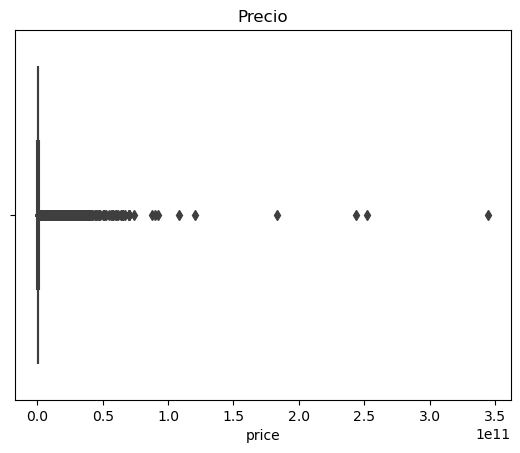

In [442]:
# Graficando un boxplot.
sns.boxplot(data=X, x='price')
plt.title('Precio');

Ahora rellenamos los valores faltantes con la media.

In [443]:
# Aplicando la media a valores nulos
X.loc[X.price.isnull(),'price'] = X.price.mean()

In [444]:
# Datos nulos en la columna precio.
X.price.isnull().sum() 

0

In [445]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       197549 non-null  object 
 1   end_date         197549 non-null  object 
 2   lat              148051 non-null  float64
 3   lon              148051 non-null  float64
 4   l2               197549 non-null  object 
 5   l3               186517 non-null  object 
 6   l4               45367 non-null   object 
 7   l5               27409 non-null   object 
 8   l6               6867 non-null    object 
 9   rooms            27537 non-null   float64
 10  bedrooms         40525 non-null   float64
 11  bathrooms        156467 non-null  float64
 12  surface_total    6974 non-null    float64
 13  surface_covered  9802 non-null    float64
 14  price            197549 non-null  float64
 15  title            197548 non-null  object 
 16  description      197428 non-null  obje

Ya no tenemos valores nulos en la columna price.

A continuación voy a graficar los puntos en la longitud y la latitud para visualizar valores que no se encuentren en Colombia.

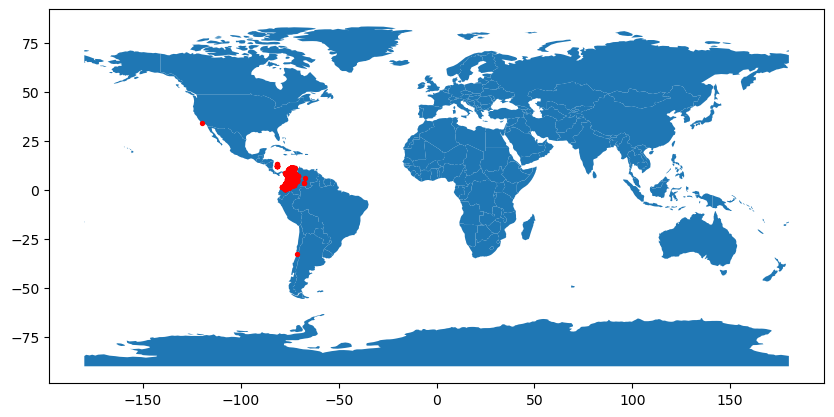

In [446]:
# Graficando los punto geográficos en un mapa.
geometry = [Point(xy) for xy in zip(X['lon'], X['lat'])]
gdf = GeoDataFrame(X, geometry=geometry)    
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=8);

Podemos ver que claramente hay un punto geográfico que no se encuentra en Colombia.

Vamos a revisar los boxplot para las variables latitud y longitud.

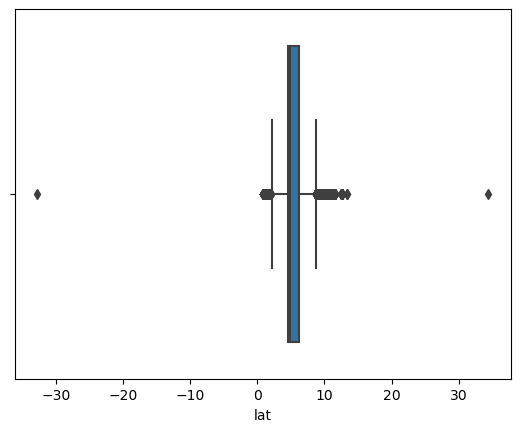

In [447]:
# Graficando la latitud.
sns.boxplot(data=X, x='lat');

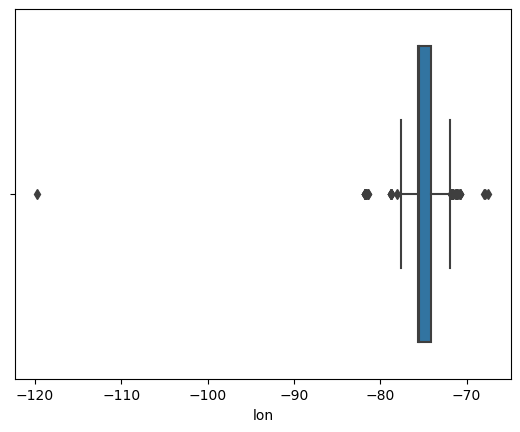

In [448]:
# Graficamos la longitud
sns.boxplot(data=X, x='lon');

Claramente podemos apreciar el outlier. Vamos a eliminarlo.

In [449]:
'''# Elimnando outlier.
X = X.loc[~(X.lat > 25)]'''

'# Elimnando outlier.\nX = X.loc[~(X.lat > 25)]'

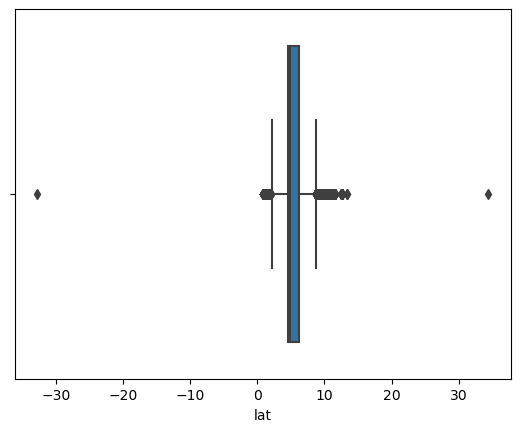

In [450]:
# Graficando la latitud.
sns.boxplot(data=X, x='lat');

Vamos a ver cuantos valores faltantes tenemos para la longitud y la latidud.

In [451]:
# Datos nulos en la columna lat.
X.lat.isnull().sum() 

49498

In [452]:
# Datos nulos en la columna lon.
X.lon.isnull().sum() 

49498

Vamos a ver si existen datos en las columnas de niveles administrativos que nos permitan completar los datos faltantes de longitud y latitud.

In [453]:
# Viendo los registros de l2 en las filas con valores faltantes de latitud.
X.loc[X.lat.isnull()].l2.unique()


array(['Santander', 'Antioquia', 'Atlántico', 'Córdoba', 'Cundinamarca',
       'Meta', 'Valle del Cauca', 'Caldas', 'Risaralda', 'Magdalena',
       'Cauca', 'Huila', 'Bolívar', 'Tolima', 'Norte de Santander',
       'Quindío', 'Caquetá', 'Sucre', 'Boyacá', 'Guainía', 'La Guajira',
       'Cesar', 'Amazonas', 'San Andrés Providencia y Santa Catalina',
       'Casanare', 'Vichada', 'Chocó'], dtype=object)

Sabiendo las provincias podemos completar los datos de longitud y latitud faltantes. 

In [454]:
# Creamos una función que asocia las provincias con su respectivo valor de longitud y latitud. 
def f_lat_lon(df):
    
    # Diccionario de latitudes.
    dict_lat = {
    'Antioquia': 7.154030, 'Atlántico': 10.987760, 'Cundinamarca': 4.781800,
    'Meta': 3.2720, 'Valle del Cauca': 3.858560, 'Caldas': 6.090000,
    'Risaralda': 4.606880, 'Magdalena': 10.249170, 'Santander': -0.622170,
    'Cauca': 8.252500, 'Huila': 3.376450, 'Bolívar': 1.833650, 'Tolima': 4.034880,
    'Norte de Santander': 8.084580, 'Quindío': 4.396070, 'Caquetá': 1.113340,
    'Sucre': 8.811250, 'Guainía': 2.719020, 'La Guajira': 11.427780,
    'Boyacá': 5.453740, 'Cesar': 10.769930, 'Amazonas': -2.056290,
    'San Andrés Providencia y Santa Catalina': 12.542720, 'Casanare': 5.296580,
    'Vichada': 4.712170, 'Córdoba': 9.586680, 'Chocó': 6.320330
    }

    # Diccionario de longitudes.
    dict_lon = {
    'Antioquia': -75.503349, 'Atlántico': -74.954620, 'Cundinamarca': -73.970757,
    'Meta': -73.0877, 'Valle del Cauca': -76.519810, 'Caldas': -75.636627,
    'Risaralda': -74.071840, 'Magdalena': -74.261080, 'Santander': -72.382812,
    'Cauca': -74.722893, 'Huila': -74.802391, 'Bolívar': -76.967293, 'Tolima': -75.255890, 
    'Norte de Santander': -72.842781, 'Quindío': -75.640083, 'Caquetá': -73.813004, 
    'Sucre': -74.721390, 'Guainía': -67.566940, 'La Guajira': -72.388634,
    'Boyacá': -73.362480, 'Cesar': -73.004791, 'Amazonas': -71.892921,
    'San Andrés Providencia y Santa Catalina': -81.717900, 'Casanare': -71.456268,
    'Vichada': -69.414350, 'Córdoba': -74.826302, 'Chocó': -76.944901
    }
    df.lat = np.where(df.lat.isnull(), df.l2.map(dict_lat), df.lat)
    df.lon = np.where(df.lon.isnull(), df.l2.map(dict_lon), df.lon)

    return None

In [455]:
# Aplicamos la función sobre nuestro dataframe.
f_lat_lon(X)

In [456]:
# Verificamos que no hay valores nulos.
print(X.lat.isnull().sum()) 
print(X.lon.isnull().sum())

0
0


En la columna de descripción puede haber información correspondiente al número de habitaciónes, cuartos, baños, etc. Vamos a explorar un poco esta columna. 

In [457]:
X.description.loc[1]

'Venta apartamento en piso 16 con vista exterior. Tiempo de construido 2 años. Area 122 m2 distribuidos de la siguiente manera: tres habitaciones, sala comedor, cocina tipo americana, dos baños. Dos parqueaderos privados, un deposito. El conjunto cuenta con seguridad las veinticuatro horas, GYM, salon comunal, piscina, billar, mesa de ping pong, cancha de fooball. El apartamento de tus sueños lo acabas de encontrar. Llamenos para tener el privilegio de atenderlos. Gracias \n'

Podemos ver que es necesario realizar ciertas operaciones de formato sobre la columna.

In [458]:
# Formateando description
X.description = X.description.str.capitalize().str.strip()
# Eliminamos caracteres como ñ y tildes.
X.description = X.description.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [459]:
# Buscamos cuantas entredas tienen la palabra baño.
X.loc[X.description.str.contains('bano', na=False)].description.count

<bound method Series.count of 1         Venta apartamento en piso 16 con vista exterio...
2         Al entrar a este bonito apartamento interior e...
4         Codigo inmueble 4302 apartamento con 3 habitac...
6         Casa de tres pisos,en el ultimo piso,terraza b...
7         Mateus inmobiliaria y constructora zagoz te pr...
                                ...                        
197541    Monviso 2 habitaciones\n* direccion exacta: cr...
197543    638-2036 venta espectacular apartamento ubicad...
197544    Vendo lindo apartamento en el tintal, sexto pi...
197546    Excelente local ubicado en el segundo piso del...
197548    Sala, comedor, 2habitaciones cocina bano patio...
Name: description, Length: 133279, dtype: object>

Vamos a crear una función que extraiga la cantidad de baños en el str de descripción y lo ingrese donde existan valores nulos en la columna bathrooms.

In [460]:
# Definimos una función que extraiga el número de baños.
def numero_banios(df):

    # Formateamos.
    df.description = df.description.str.capitalize().str.strip()
    df.description = df.description.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    # Vamos a llenar las filas nulas.
    df.loc[df.description.isnull(), 'description'] = 'Sin descripcion'
    
    # Cambiamos los números escritos por su símbolo.
    dict_num = {' uno ': ' 1 ', ' dos ':' 2 ', ' tres ':' 3 ', ' cuatro ':' 4 ', ' cinco ':' 5 ', ' seis ':' 6 ', ' siete ':' 7 ', ' ocho ':' 8 ', ' nueve ':' 9 '}
    for letra, simbolo in dict_num.items():
        df.description = df.description.str.replace(letra, simbolo, regex=False)

    # Extraemos el número
    numero = f"(\d+)[\s-](?:{'bano'})"
    bathrooms = df.loc[df.bathrooms.isnull()].description.str.extract(numero)
    df = df.join(bathrooms)
    
    # Cambiamos valores nulos por el número de baños
    df.loc[(df.bathrooms.isnull()) & (df[0].notnull()), 'bathrooms'] = df[0]
    df.drop([0], axis='columns',inplace=True)

    # Utilizaremos la moda en aquellos valores que sigan siendo nulos.
    moda_bath = df.groupby(['property_type']).bathrooms.agg(pd.Series.mode)
    moda_bath.loc['Parqueadero'] = 0
    df.bathrooms = np.where(df.bathrooms.isnull(), df.property_type.map(moda_bath), df.bathrooms)
    df.bathrooms = df.bathrooms.astype(int)

    return df

In [461]:
X = numero_banios(X)

In [462]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   start_date       197549 non-null  object  
 1   end_date         197549 non-null  object  
 2   lat              197549 non-null  float64 
 3   lon              197549 non-null  float64 
 4   l2               197549 non-null  object  
 5   l3               186517 non-null  object  
 6   l4               45367 non-null   object  
 7   l5               27409 non-null   object  
 8   l6               6867 non-null    object  
 9   rooms            27537 non-null   float64 
 10  bedrooms         40525 non-null   float64 
 11  bathrooms        197549 non-null  int32   
 12  surface_total    6974 non-null    float64 
 13  surface_covered  9802 non-null    float64 
 14  price            197549 non-null  float64 
 15  title            197548 non-null  object  
 16  description      197

Vamos a eliminar las columnas que no vamos a utilizar. 

In [463]:
X.columns

Index(['start_date', 'end_date', 'lat', 'lon', 'l2', 'l3', 'l4', 'l5', 'l6',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'title', 'description', 'property_type', 'geometry'],
      dtype='object')

In [464]:
X.drop(['l4', 'l5', 'l6','rooms', 'bedrooms','surface_total', 'surface_covered','title', 'description', 'geometry'], axis='columns', inplace=True)

In [465]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   start_date     197549 non-null  object 
 1   end_date       197549 non-null  object 
 2   lat            197549 non-null  float64
 3   lon            197549 non-null  float64
 4   l2             197549 non-null  object 
 5   l3             186517 non-null  object 
 6   bathrooms      197549 non-null  int32  
 7   price          197549 non-null  float64
 8   property_type  197549 non-null  object 
dtypes: float64(3), int32(1), object(5)
memory usage: 12.8+ MB


Ahora vamos a entrenar el modelo

In [466]:
# Importando librerias
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score

In [467]:
X.columns

Index(['start_date', 'end_date', 'lat', 'lon', 'l2', 'l3', 'bathrooms',
       'price', 'property_type'],
      dtype='object')

In [468]:
# Creamos el dataframe de entrenamiento
X_train = X[['start_date', 'end_date', 'lat', 'lon', 'l2', 'l3', 'bathrooms', 'price', 'property_type']].copy()
X_train.head()

,start_date,end_date,lat,lon,l2,l3,bathrooms,price,property_type
0,2020-12-14,9999-12-31,6.203000,-75.572000,Antioquia,Medellín,4,9.000000e+09,Casa
1,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,2,6.250000e+08,Apartamento
2,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,2,4.200000e+08,Casa
3,2020-11-23,2020-11-30,-0.622170,-72.382812,Santander,Bucaramanga,1,1.310000e+09,Otro
4,2020-10-06,2020-10-07,7.154030,-75.503349,Antioquia,Medellín,2,2.100000e+08,Apartamento


In [469]:
# Creamos la columna target. Se asocia 1 a los precios por encima de la media y 0 por debajo.
X_train['target'] = np.where(X_train['price']>=X_train.price.mean(), 1, 0)
X_train.head()

,start_date,end_date,lat,lon,l2,l3,bathrooms,price,property_type,target
0,2020-12-14,9999-12-31,6.203000,-75.572000,Antioquia,Medellín,4,9.000000e+09,Casa,1
1,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,2,6.250000e+08,Apartamento,0
2,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,2,4.200000e+08,Casa,0
3,2020-11-23,2020-11-30,-0.622170,-72.382812,Santander,Bucaramanga,1,1.310000e+09,Otro,1
4,2020-10-06,2020-10-07,7.154030,-75.503349,Antioquia,Medellín,2,2.100000e+08,Apartamento,0


In [470]:
X.property_type.unique()

array(['Casa', 'Apartamento', 'Otro', 'Oficina', 'Finca', 'Lote',
       'Local comercial', 'Parqueadero'], dtype=object)

In [471]:
# Creamos dummies para los tipos de propiedad
X_train[['Apartamento','Casa','Finca','Local comercial','Lote','Oficina','Otro','Parqueadero']] = pd.get_dummies(X_train.property_type)
X_train.drop(['property_type'],axis='columns', inplace=True)

In [472]:
X_train.head()

,start_date,end_date,lat,lon,l2,l3,bathrooms,price,target,Apartamento,Casa,Finca,Local comercial,Lote,Oficina,Parqueadero
0,2020-12-14,9999-12-31,6.203000,-75.572000,Antioquia,Medellín,4,9.000000e+09,1,0,1,0,0,0,0,0
1,2020-09-16,2021-05-14,4.722748,-74.073115,Cundinamarca,Bogotá D.C,2,6.250000e+08,0,1,0,0,0,0,0,0
2,2020-08-19,2020-08-20,4.709000,-74.030000,Cundinamarca,Bogotá D.C,2,4.200000e+08,0,0,1,0,0,0,0,0
3,2020-11-23,2020-11-30,-0.622170,-72.382812,Santander,Bucaramanga,1,1.310000e+09,1,0,0,0,0,0,0,0
4,2020-10-06,2020-10-07,7.154030,-75.503349,Antioquia,Medellín,2,2.100000e+08,0,1,0,0,0,0,0,0


In [473]:
X_train.columns

Index(['start_date', 'end_date', 'lat', 'lon', 'l2', 'l3', 'bathrooms',
       'price', 'target', 'Apartamento', 'Casa', 'Finca', 'Local comercial',
       'Lote', 'Oficina', 'Parqueadero'],
      dtype='object')

In [474]:
# Creamos la variable target
y_train = X_train.target
X_train = X_train[['lat', 'lon','bathrooms','Apartamento','Casa','Finca', 'Otro', 'Local comercial','Lote','Oficina','Parqueadero',]]

In [475]:
# Vamos a probar dos clasificadores: Random Forest y Gradient Boosting
clasificadores = [RandomForestClassifier(random_state=45), GradientBoostingClassifier(random_state=5)]

In [476]:
for clf in clasificadores:
    name = clf.__class__.__name__
    clf = Pipeline(steps=[('ss', StandardScaler()), ('clf', clf)])
    _scoring = ['accuracy', 'recall']
    results = cross_validate(estimator=clf,
                        X=X_train,
                        y=y_train,
                        cv=5,
                        scoring=_scoring,
                        return_train_score=True)
    print('*'*5,name,'*'*5) 
    print('accuracy: ', round(results['train_accuracy'].mean()*100,2),' ± ',round(results['train_accuracy'].std(),5))
    print('recall: ', results['train_recall'].mean()*100, ' ± ', round(results['train_recall'].std(),2))

***** RandomForestClassifier *****
accuracy:  95.66  ±  0.00026
recall:  90.44308509749872  ±  0.0
***** GradientBoostingClassifier *****
accuracy:  84.4  ±  0.00049
recall:  51.71806343371962  ±  0.0


A continuación realizaremos las predicciones:

In [477]:
# Creamos el dataframe de prueba.
X_test = pd.read_csv('datasets/properties_colombia_test.csv')
X_test.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
2,119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,...,1.0,NaN,NaN,COP,NaN,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)
3,227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,9999-12-31,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,...,NaN,2793.0,NaN,COP,NaN,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203)
4,228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,2020-12-11,2020-12-10,NaN,NaN,Colombia,Antioquia,...,2.0,NaN,NaN,COP,NaN,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY


In [478]:
# Eliminando las columnas que no se utilizan.
X_test.drop(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
            'l1', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
            'surface_total', 'surface_covered', 'currency', 'price_period', 
            'title', 'operation_type', 'geometry'], axis='columns', inplace=True)

X_test.columns

Index(['lat', 'lon', 'l2', 'bathrooms', 'description', 'property_type'], dtype='object')

In [480]:
# Realizando los cambios necesarios en el dataframe
f_lat_lon(X_test)
X_test = numero_banios(X_test)
X_test[['Apartamento','Casa','Finca','Local comercial','Lote','Oficina', 'Otro', 'Parqueadero']] = pd.get_dummies(X_test.property_type)
X_test.drop('property_type',axis='columns', inplace=True)
X_test.drop(['l2','description'], axis='columns', inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              65850 non-null  float64
 1   lon              65850 non-null  float64
 2   bathrooms        65850 non-null  int32  
 3   Apartamento      65850 non-null  uint8  
 4   Casa             65850 non-null  uint8  
 5   Finca            65850 non-null  uint8  
 6   Local comercial  65850 non-null  uint8  
 7   Lote             65850 non-null  uint8  
 8   Oficina          65850 non-null  uint8  
 9   Otro             65850 non-null  uint8  
 10  Parqueadero      65850 non-null  uint8  
dtypes: float64(2), int32(1), uint8(8)
memory usage: 1.8 MB


In [481]:
# Entrenando al modelo
clf = Pipeline(steps=[('ss', StandardScaler()), ('clf', RandomForestClassifier(random_state=45))])
clf.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('clf', RandomForestClassifier(random_state=45))])

In [ ]:
# Guardamos los valores obtenidos en un array
pred = clf.predict(X_test)

In [ ]:
pred

In [ ]:
# Exportamos los valores en un csv
DF = pd.DataFrame(pred)
DF.to_csv("gusofficial.csv", header='pred', index=False)